<span style="font-size:36px"><b>Foundation of Machine Learning</b></span>

Copyright 2019 Gunawan Lumban Gaol

Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language overning permissions and limitations under the License.

# Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from configparser import ConfigParser

from edapy.edapy import transformation
from edapy.edapy import plotting

In [2]:
config = ConfigParser()
config.read('./config.ini')

['./config.ini']

# Import Data

German Credit Data from [UCI](https://archive.ics.uci.edu/ml/datasets/Statlog+(German+Credit+Data)).

* Attribute 1: (qualitative) Status of existing checking account
    * A11 : ... < 0 DM
    * A12 : 0 <= ... < 200 DM
    * A13 : ... >= 200 DM / salary assignments for at least 1 year
    * A14 : no checking account

* Attribute 2: (numerical) Duration in month

* Attribute 3: (qualitative) Credit history
    * A30 : no credits taken/ all credits paid back duly
    * A31 : all credits at this bank paid back duly
    * A32 : existing credits paid back duly till now
    * A33 : delay in paying off in the past
    * A34 : critical account/ other credits existing (not at this bank)

* Attribute 4: (qualitative) Purpose
    * A40 : car (new)
    * A41 : car (used)
    * A42 : furniture/equipment
    * A43 : radio/television
    * A44 : domestic appliances
    * A45 : repairs
    * A46 : education
    * A47 : (vacation - does not exist?)
    * A48 : retraining
    * A49 : business
    * A410 : others

* Attribute 5: (numerical) Credit amount

* Attibute 6: (qualitative) Savings account/bonds
    * A61 : ... < 100 DM
    * A62 : 100 <= ... < 500 DM
    * A63 : 500 <= ... < 1000 DM
    * A64 : .. >= 1000 DM
    * A65 : unknown/ no savings account

* Attribute 7: (qualitative) Present employment since
    * A71 : unemployed
    * A72 : ... < 1 year
    * A73 : 1 <= ... < 4 years
    * A74 : 4 <= ... < 7 years
    * A75 : .. >= 7 years

* Attribute 8: (numerical) Installment rate in percentage of disposable income

* Attribute 9: (qualitative) Personal status and sex
    * A91 : male : divorced/separated
    * A92 : female : divorced/separated/married
    * A93 : male : single
    * A94 : male : married/widowed
    * A95 : female : single

* Attribute 10: (qualitative) Other debtors / guarantors
    * A101 : none
    * A102 : co-applicant
    * A103 : guarantor

* Attribute 11: (numerical) Present residence since

* Attribute 12: (qualitative) Property
    * A121 : real estate
    * A122 : if not A121 : building society savings agreement/ life insurance
    * A123 : if not A121/A122 : car or other, not in attribute 6
    * A124 : unknown / no property

* Attribute 13: (numerical) Age in years

* Attribute 14: (qualitative) Other installment plans
    * A141 : bank
    * A142 : stores
    * A143 : none

* Attribute 15: (qualitative) Housing
    * A151 : rent
    * A152 : own
    * A153 : for free

* Attribute 16: (numerical) Number of existing credits at this bank

* Attribute 17: (qualitative) Job
    * A171 : unemployed/ unskilled - non-resident
    * A172 : unskilled - resident
    * A173 : skilled employee / official
    * A174 : management/ self-employed/
    * highly qualified employee/ officer

* Attribute 18: (numerical) Number of people being liable to provide maintenance for

* Attribute 19: (qualitative) Telephone
    * A191 : none
    * A192 : yes, registered under the customers name

* Attribute 20: (qualitative) foreign worker
    * A201 : yes
    * A202 : no

In [3]:
data = pd.read_csv('csv/german_credit.csv')

In [4]:
data.shape

(1000, 21)

# Data Preprocessing

* Check missing & null data, remove them if necessary
* Check infinite values data, remove or convert to null if necessary
* Check duplicated data, remove them if necessary
* Split numerical and categorical column

Before proceed, set 'col_id' and 'col_target' from the data.

In [5]:
col_ID = ''
col_target = 'credit_amount'

## Missing & Null Data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

No missing data, continue.

## Infinite Values Data

In [7]:
data = data.replace([np.inf, -np.inf], np.nan)

## Duplicated Data

In [8]:
data.duplicated(subset=list(set(data.columns) - set(col_target))).sum()

0

No duplicated data, continue.

## Split Numerical & Categorical Data

* Create numerical & categorical column list.

In [9]:
transformation.convert_to_categorical(data)

Column default casted to categorical
Column account_check_status casted to categorical
Column credit_history casted to categorical
Column purpose casted to categorical
Column savings casted to categorical
Column present_emp_since casted to categorical
Column installment_as_income_perc casted to categorical
Column personal_status_sex casted to categorical
Column other_debtors casted to categorical
Column present_res_since casted to categorical
Column property casted to categorical
Column other_installment_plans casted to categorical
Column housing casted to categorical
Column credits_this_bank casted to categorical
Column job casted to categorical
Column people_under_maintenance casted to categorical
Column telephone casted to categorical
Column foreign_worker casted to categorical


In [10]:
if (data[col_target].nunique() == 2):
    cols_num = list(set(data.select_dtypes(include=[np.number]).columns) - set([col_ID]))
    cols_cat = list(set(data.select_dtypes(exclude=[np.number]).columns) - set([col_target]))
else:
    cols_num = list(set(data.select_dtypes(include=[np.number]).columns) - set([col_ID, col_target]))
    cols_cat = list(set(data.select_dtypes(exclude=[np.number]).columns))

# Data Understanding

* Distribution of target column
* For each combination of data
    * Plot distribution of numerical column, grouped by target column
    * Plot mode (distribution) of categorical column, grouped by target column
* Analyze business questions related to the data   

## Univariate Analysis

### Target Column

count     1000.000000
mean      3271.258000
std       2822.736876
min        250.000000
25%       1365.500000
50%       2319.500000
75%       3972.250000
max      18424.000000
Name: credit_amount, dtype: float64


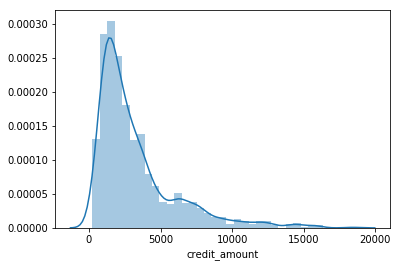

In [276]:
if (data[col_target].nunique() == 2): # binary target
    print(data[col_target].value_counts())
    print(data[col_target].value_counts(normalize=True))
else:
    print(data[col_target].describe())
    sns.distplot(data[col_target])

### Numerical Columns

In [12]:
data[cols_num].describe()

,duration_in_month,age
count,1000.000000,1000.000000
mean,20.903000,35.546000
std,12.058814,11.375469
min,4.000000,19.000000
25%,12.000000,27.000000
50%,18.000000,33.000000
75%,24.000000,42.000000
max,72.000000,75.000000


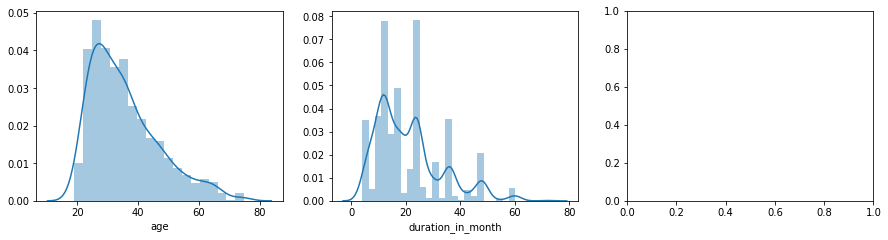

In [13]:
plotting.distplot_numerical(data, cols_num)

### Categorical Columns

In [14]:
data[cols_cat].describe()

,savings,purpose,personal_status_sex,property,other_debtors,credits_this_bank,foreign_worker,present_res_since,credit_history,other_installment_plans,people_under_maintenance,job,installment_as_income_perc,account_check_status,default,housing,present_emp_since,telephone
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,5,10,4,4,3,4,2,4,5,3,2,4,4,4,2,3,5,2
top,... < 100 DM,domestic appliances,male : single,"if not A121/A122 : car or other, not in attrib...",none,1,yes,4,existing credits paid back duly till now,none,1,skilled employee / official,4,no checking account,0,own,1 <= ... < 4 years,none
freq,603,280,548,332,907,633,963,413,530,814,845,630,476,394,700,713,339,596


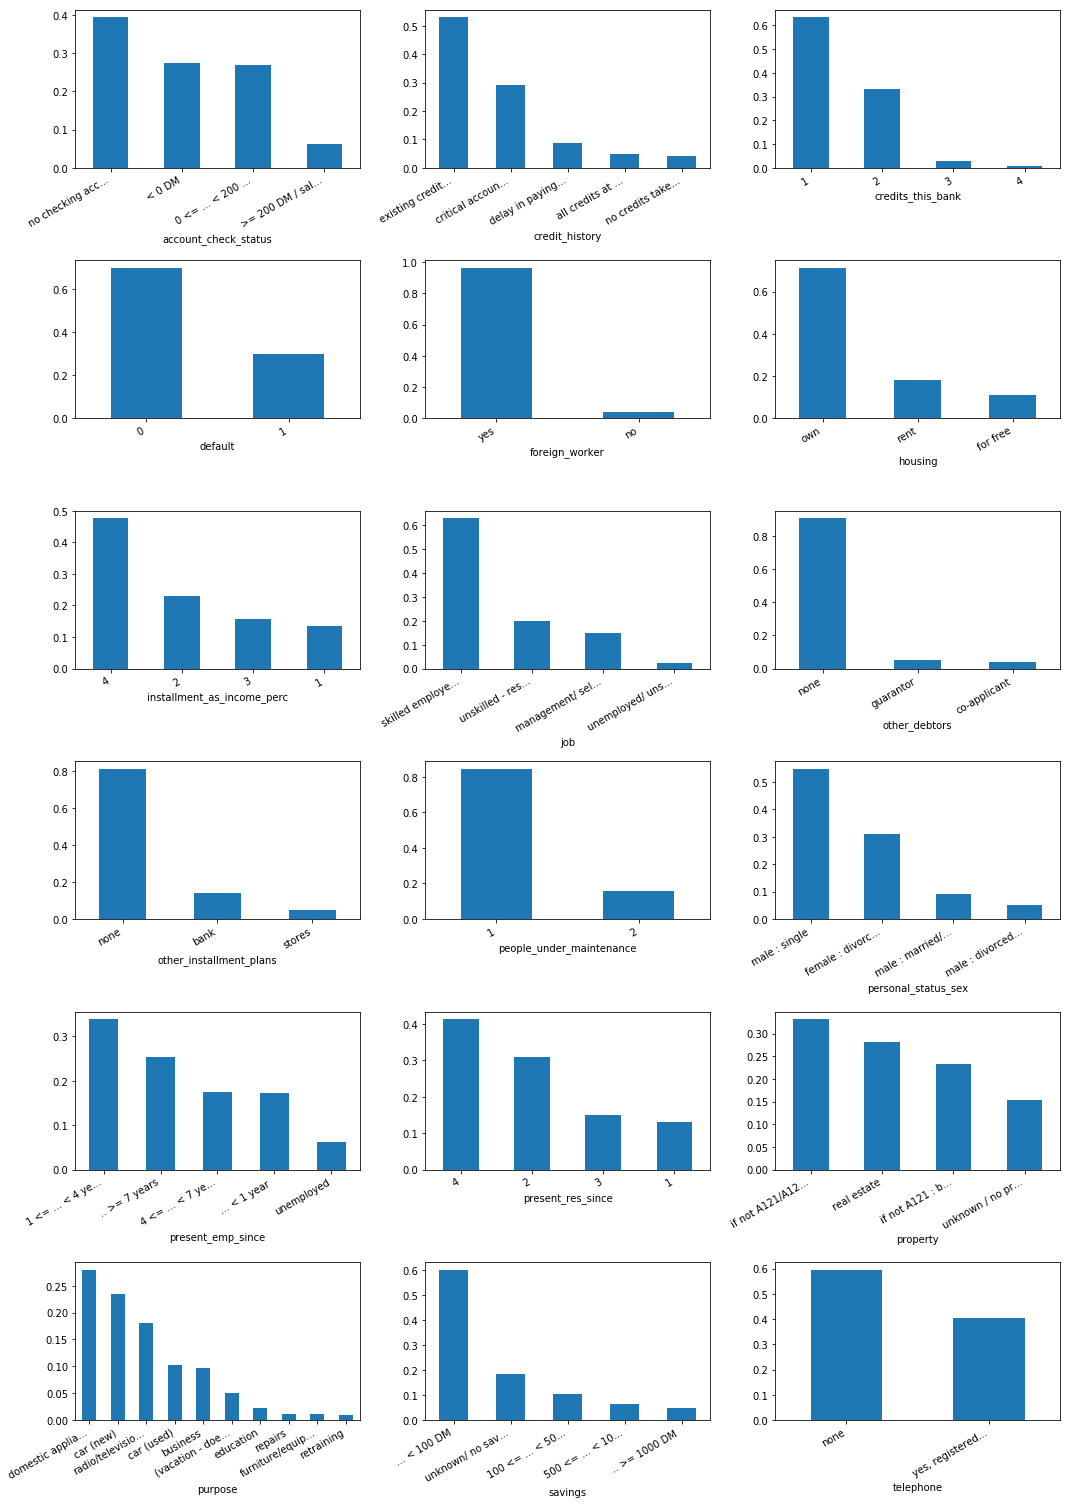

In [15]:
plotting.distplot_categorical(data, cols_cat)

## Bivariate (Attribute - Attribute) Analysis

* See correlation between each numerical attributes.

In [16]:
from scipy.stats import pearsonr
def corrfunc(x,y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    # Unicode for lowercase rho (ρ)
    rho = '\u03C1'
    ax.annotate(f'{rho} = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

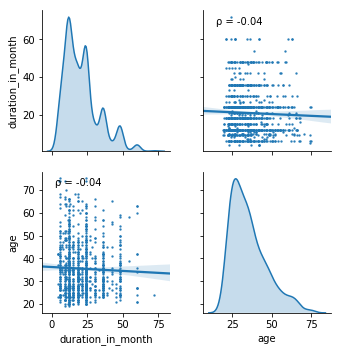

In [97]:
g = sns.pairplot(data[cols_num], kind='reg', plot_kws=dict(scatter_kws=dict(s=2)), diag_kind='kde')
g.map_lower(corrfunc)
g.map_upper(corrfunc)

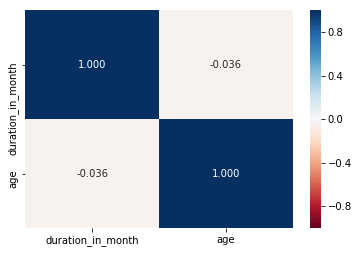

In [132]:
sns.heatmap(data[cols_num].corr(), annot=True, fmt='.3f', vmin=-1.0, vmax=1.0, cmap='RdBu')

## Bivariate (Attribute - Target) Analysis

### Numerical Columns

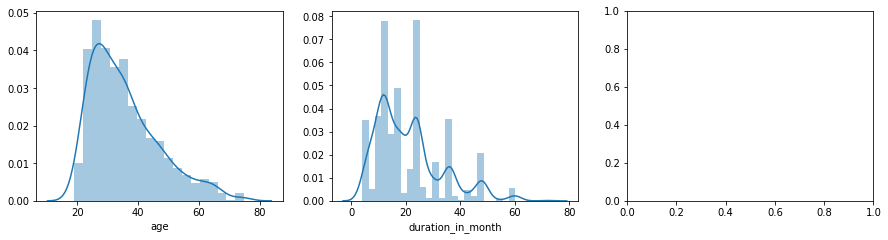

In [18]:
plotting.distplot_numerical(data, cols_num, col_target)

### Categorical Columns

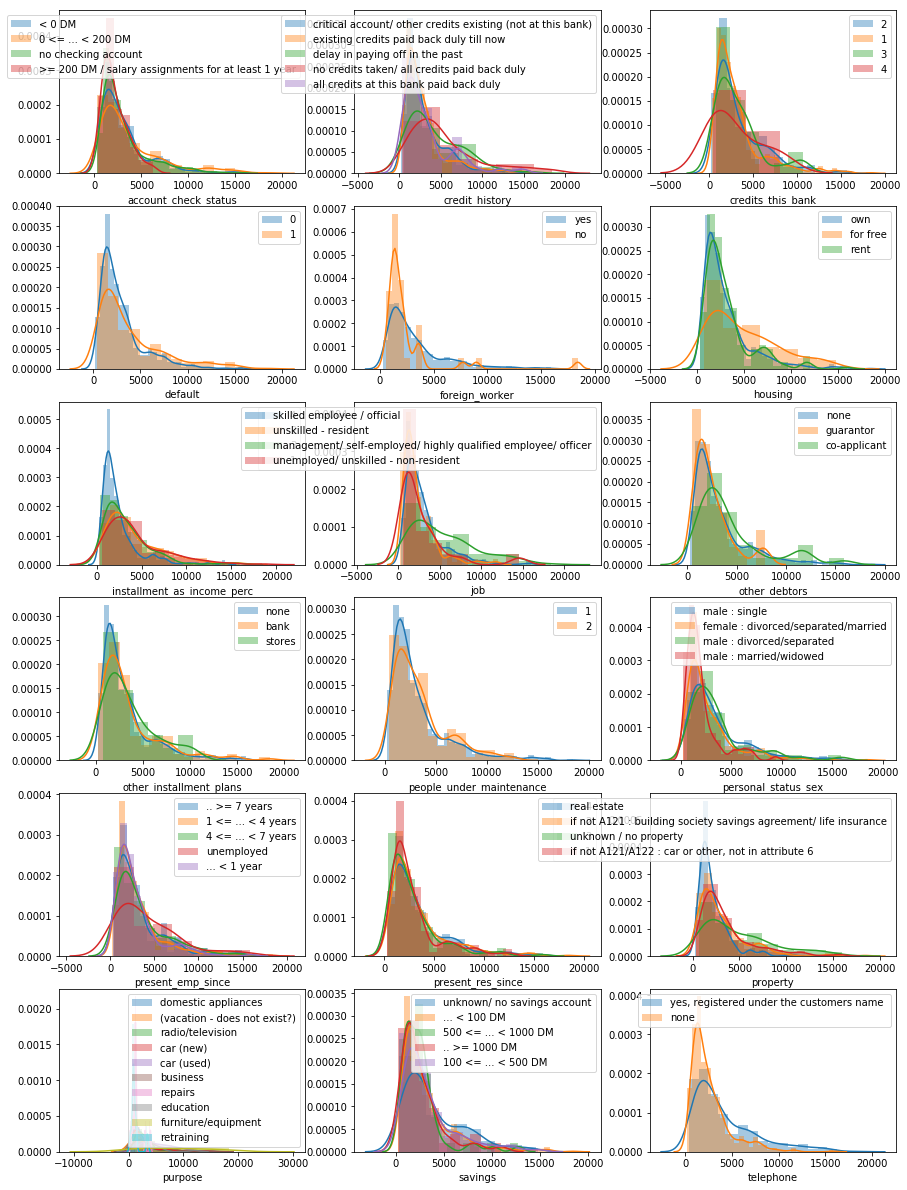

In [19]:
plotting.distplot_categorical(data, cols_cat, col_target)

**Conclusion**

* Need to replot those category with cluttered legend.

# Feature Engineering

In [133]:
data['credit_per_person'] = data['credit_amount'] / data['people_under_maintenance'].astype('float')
data['age_bin'] = transformation.reduce_ordinal_category(data['age'], [-np.inf, 20, 35, 50, np.inf], ['<10', '10-30', '30-50', '>50'])

# Modelling

## Linear Regression

Assumption in linear regression:
* Relation between dependant variable and independant variable is linear
* Error or residual of the model need to be normally distributed
* There is no multicollinearity 

What is missed in class before doing linear regression
* We can't just use Pearson Correlation to find [correlation between categorical variables]( https://datascience.stackexchange.com/questions/893/how-to-get-correlation-between-two-categorical-variable-and-a-categorical-variab). Why do we need to calculate it? To prevent [multicolinearity](https://stats.stackexchange.com/questions/1149/is-there-an-intuitive-explanation-why-multicollinearity-is-a-problem-in-linear-r).


In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

### Univariate Linear Regression

In [156]:
def univariate_linear_regression(X, y):
    X = X.values.reshape(-1, 1)
    y = y.values.reshape(-1, 1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    
    train_preds = reg.predict(X_train)
    test_preds = reg.predict(X_test)

    train_mse = mean_squared_error(y_train, train_preds)
    test_mse = mean_squared_error(y_test, test_preds)

    print(str.ljust("Train Mean Squared Error ", 25), str.rjust("{:3f}".format(train_mse), 20))
    print(str.ljust("Test Mean Squared Error ", 25), str.rjust("{:3f}".format(test_mse), 20))

    fig, ax = plt.subplots(2, 2, figsize=(14, 9))
    # Train
    ax[0][0].scatter(X_train, y_train, s=5)
    ax[0][0].plot(X_train, train_preds)
    ax[0][0].set_title("Train")
    # Test
    ax[0][1].scatter(X_test, y_test, s=5)
    ax[0][1].plot(X_test, test_preds)
    ax[0][1].set_title("Test")
    
    res_train = train_preds - y_train
    res_test = test_preds - y_test
    sns.distplot(res_train, ax=ax[1][0])
    sns.distplot(res_test, ax=ax[1][1])

####  `duration_in_month` - `credit_amount`

Train Mean Squared Error        5097189.752350
Test Mean Squared Error         3923106.771542


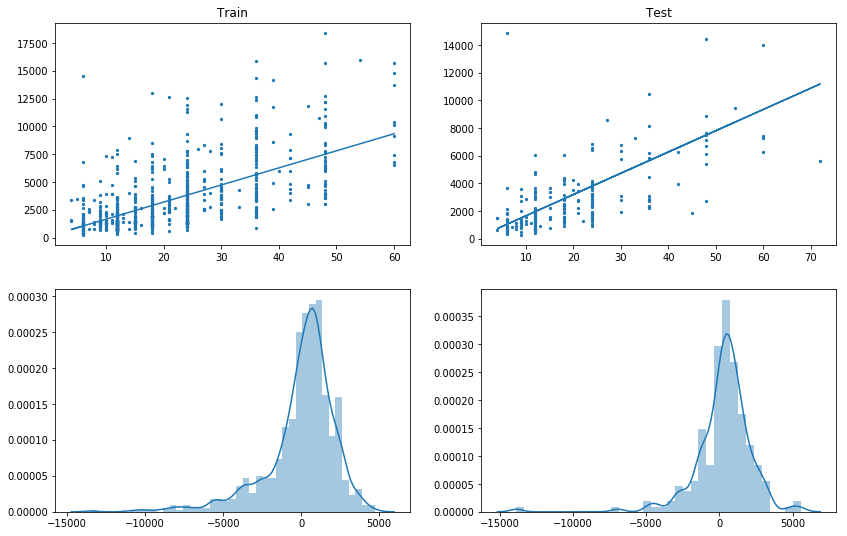

In [157]:
univariate_linear_regression(data[['duration_in_month']], data[col_target])

#### `age` - `credit_amount`

Train Mean Squared Error        8380421.142601
Test Mean Squared Error         6274929.244848


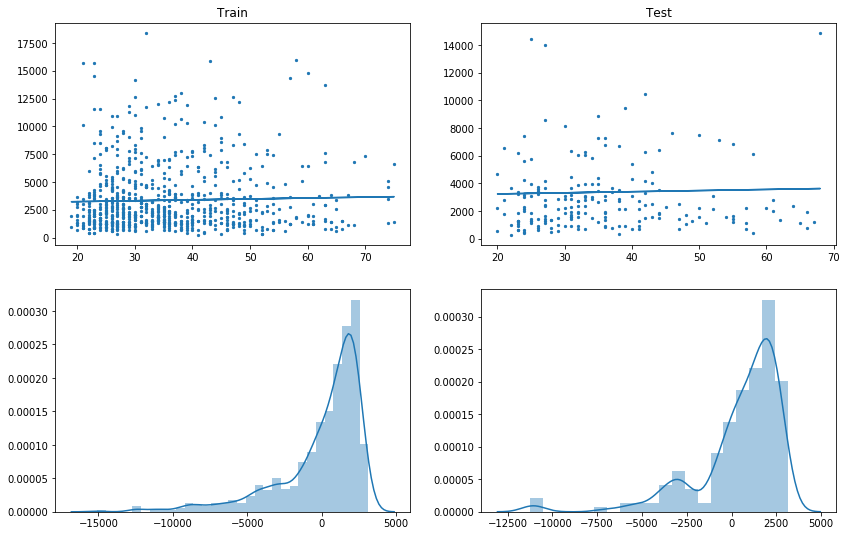

In [90]:
univariate_linear_regression(data[['age']], data[col_target])

Model with `duration_in_month` performs better since the mse value metrics we used is lower than the model which used `age`.

### Multivariate Linear Regression

In [188]:
def multivariate_linear_regression(X, cols_num, cols_cat, col_target, test_size=0.2):
    df = X.copy()
    
    for col in cols_cat:
        df = pd.concat([df, pd.get_dummies(df[col], prefix='d_'+col, drop_first=True)], axis=1)
    cols_cat_d = [c for c in df.columns if 'd_' in c]
    cols_feature = cols_num+cols_cat_d
    
    X = df[[c for c in cols_feature]]
    y = df[col_target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    
    train_preds = reg.predict(X_train)
    test_preds = reg.predict(X_test)

    train_mse = mean_squared_error(y_train, train_preds)
    test_mse = mean_squared_error(y_test, test_preds)

    print(str.ljust("Train Mean Squared Error ", 25), str.rjust("{:3f}".format(train_mse), 20))
    print(str.ljust("Test Mean Squared Error ", 25), str.rjust("{:3f}".format(test_mse), 20))
    print()
    
    result = sm.OLS(y_train, X_train).fit()
    print(result.summary())

In [189]:
multivariate_linear_regression(data, cols_num, cols_cat, col_target)

Train Mean Squared Error        3193415.040428
Test Mean Squared Error         2917241.904782

                                 OLS Regression Results                                
Dep. Variable:          credit_amount   R-squared (uncentered):                   0.836
Model:                            OLS   Adj. R-squared (uncentered):              0.824
Method:                 Least Squares   F-statistic:                              70.49
Date:                Fri, 01 Nov 2019   Prob (F-statistic):                   4.45e-255
Time:                        16:08:45   Log-Likelihood:                         -7129.8
No. Observations:                 800   AIC:                                  1.437e+04
Df Residuals:                     746   BIC:                                  1.462e+04
Df Model:                          54                                                  
Covariance Type:            nonrobust                                                  
                         

## Logistic Regression

In [205]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [271]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import auc, confusion_matrix, roc_auc_score, classification_report

def logistic_regression(X, cols_num, cols_cat, col_target, test_size=0.2):
    df = X.copy()
    
    for col in cols_cat:
        df = pd.concat([df, pd.get_dummies(df[col], prefix='d_'+col, drop_first=True)], axis=1)
    cols_cat_d = [c for c in df.columns if 'd_' in c]
    cols_feature = cols_num+cols_cat_d
    
    X = df[[c for c in cols_feature]]
    y = df[col_target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0)
    
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.fit_transform(X_test)
    
    log_reg = LogisticRegression(solver='lbfgs', multi_class='multinomial')
    log_reg.fit(X_train, y_train)
    
    train_preds = log_reg.predict(X_train)
    test_preds = log_reg.predict(X_test)
    
    cm_train = confusion_matrix(y_train, train_preds)
    cm_test = confusion_matrix(y_test, test_preds)
    
    roc_auc_train = roc_auc_score(y_train, train_preds)
    roc_auc_test = roc_auc_score(y_test, test_preds)
    
    print(classification_report(y_train, train_preds))
    print()
    print(classification_report(y_test, test_preds))
    
    # ROC Curve
    y_train_sample_score = log_reg.decision_function(X_train)
    fpr_train, tpr_train, thresholds = roc_curve(y_train, y_train_sample_score)
    y_pred_sample_score = log_reg.decision_function(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_sample_score)

    roc_auc_train = auc(fpr_train, tpr_train)
    roc_auc = auc(fpr,tpr)

    # Plot ROC
    fig, ax = plt.subplots(figsize=(8, 6))
    plt.title('Receiver Operating Characteristic')
    ax.plot(fpr_train, tpr_train, 'g', label='AUC_train = %0.3f'% roc_auc_train)
    ax.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
    ax.legend(loc='lower right')
    ax.plot([0,1],[0,1],'r--')
    ax.set_xlim([0,1.0])
    ax.set_ylim([0,1.01])
    ax.set_ylabel('True Positive Rate')
    ax.set_xlabel('False Positive Rate')
    plt.show()
    
    return cm_train, cm_test, roc_auc_train, roc_auc_test

              precision    recall  f1-score   support

           0       0.82      0.89      0.86       558
           1       0.69      0.56      0.62       242

    accuracy                           0.79       800
   macro avg       0.76      0.73      0.74       800
weighted avg       0.78      0.79      0.79       800


              precision    recall  f1-score   support

           0       0.81      0.82      0.82       142
           1       0.55      0.53      0.54        58

    accuracy                           0.74       200
   macro avg       0.68      0.68      0.68       200
weighted avg       0.74      0.74      0.74       200



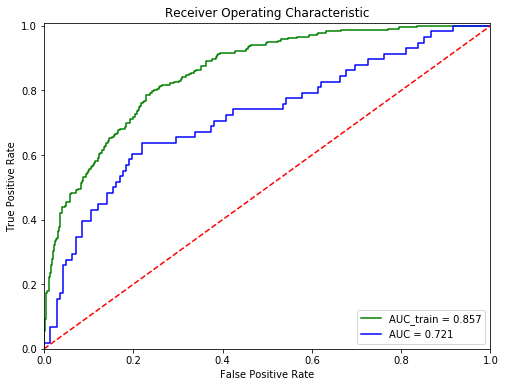

In [272]:
cm_train, cm_test, roc_auc_train, roc_auc_test = logistic_regression(data, cols_num+['credit_amount'], list(set(cols_cat) - set(['default'])), 'default')